# Student Performance Dataset Analysis

This notebook refactors the data loading and processing into a structured `StudentPerformanceDataset` class.
It includes loading, cleaning, encoding, and visualization capabilities.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ensure plots display inline
%matplotlib inline

In [7]:
class StudentPerformanceDataset:
    def __init__(self, csv_path):
        """
        Initialize the dataset with the path to the CSV file.
        """
        self.csv_path = csv_path
        self.df = None

    def load_and_clean(self):
        """
        Loads the dataset, handles missing values, removes duplicates, and drops irrelevant columns.
        """
        # Load csv with specific NA values
        self.df = pd.read_csv(self.csv_path, na_values="N/A")
        
        # Drop rows with missing values
        self.df = self.df.dropna()
        
        # Drop duplicate rows
        self.df = self.df.drop_duplicates()
        
        # Drop student_id if present as it's not a predictive feature
        if 'student_id' in self.df.columns:
            self.df = self.df.drop(columns=['student_id'])
        
        print("Data loaded and cleaned successfully.")
        print(f"Current shape: {self.df.shape}")
        return self.df

    def encode_categorical(self):
        """
        Encodes all categorical features using Label Encoding.
        """
        if self.df is None:
            raise ValueError("Dataframe not loaded. Call load_and_clean() first.")
            
        le = LabelEncoder()
        # Identify object columns
        object_cols = self.df.select_dtypes(include=['object']).columns
        
        for col in object_cols:
            self.df[col] = le.fit_transform(self.df[col])
            print(f"Encoded column: {col}")
        
        return self.df

    def plot_gender_distribution(self):
        """
        Plots a pie chart of the gender distribution.
        """
        if self.df is None:
             raise ValueError("Dataframe not loaded.")
             
        counts = self.df['gender'].value_counts()
        
        plt.figure(figsize=(6, 6))
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
        plt.title("Gender Distribution")
        plt.show()

    def plot_exam_vs_mental_health(self):
        """
        Plots a bar chart of Exam Score vs Mental Health Rating.
        """
        if self.df is None:
             raise ValueError("Dataframe not loaded.")
             
        plt.figure(figsize=(8, 6))
        sns.barplot(y="exam_score", x="mental_health_rating", data=self.df)
        plt.title("Exam Score vs Mental Health Rating")
        plt.show()

    def plot_correlation(self):
        """
        Plots a heatmap of the feature correlations.
        """
        if self.df is None:
            raise ValueError("Dataframe not loaded.")
            
        # Select only numeric columns for correlation
        numeric_df = self.df.select_dtypes(include=['float64', 'int64'])
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Feature Correlation Matrix")
        plt.show()

    def get_features_targets(self, target_column='exam_score'):
        """
        Splits the data into Features (X) and Target (y).
        Returns X, y
        """
        if self.df is None:
            raise ValueError("Dataframe not loaded.")
            
        if target_column not in self.df.columns:
            raise ValueError(f"Target column '{target_column}' not found in dataset.")
            
        X = self.df.drop(columns=[target_column])
        y = self.df[target_column]
        
        return X, y
    
    def get_dataframe(self):
        return self.df

Data loaded and cleaned successfully.
Current shape: (909, 15)
Generating Visualizations (Pre-Encoding/Mixed)...


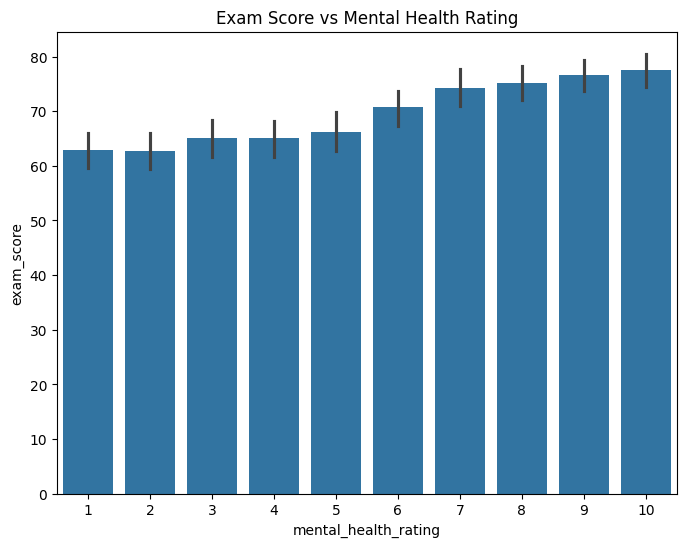

Encoded column: gender
Encoded column: part_time_job
Encoded column: diet_quality
Encoded column: parental_education_level
Encoded column: internet_quality
Encoded column: extracurricular_participation


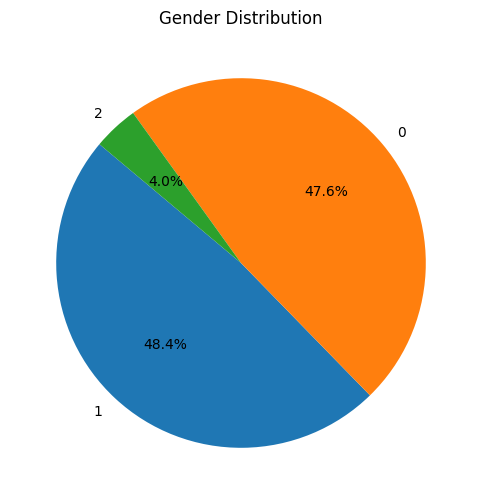

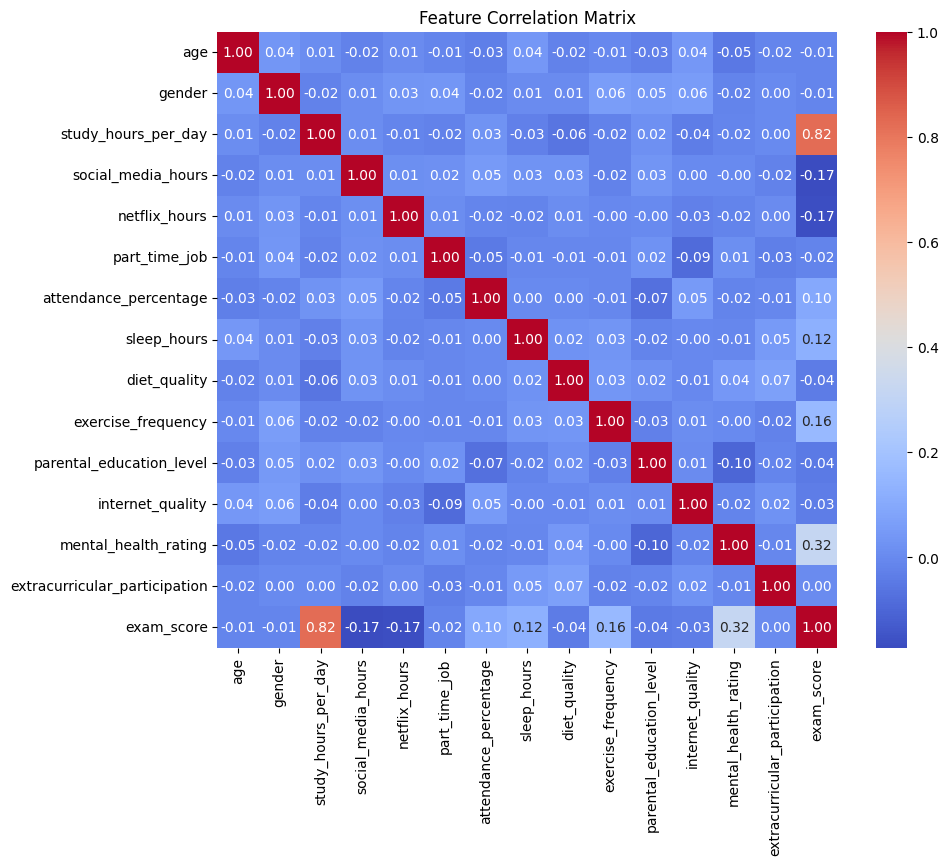


Features (X) - Head:
   age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
0   23       0                  0.0                 1.2            1.1   
1   20       0                  6.9                 2.8            2.3   
2   21       1                  1.4                 3.1            1.3   
3   23       0                  1.0                 3.9            1.0   
4   19       0                  5.0                 4.4            0.5   

   part_time_job  attendance_percentage  sleep_hours  diet_quality  \
0              0                   85.0          8.0             0   
1              0                   97.3          4.6             1   
2              0                   94.8          8.0             2   
3              0                   71.0          9.2             2   
4              0                   90.9          4.9             0   

   exercise_frequency  parental_education_level  internet_quality  \
0                   6                      

In [8]:
# Main Execution pipeline

# 1. Initialize Dataset
dataset = StudentPerformanceDataset("student_habits_performance.csv")

# 2. Load and Clean Data
df = dataset.load_and_clean()

# 3. Visualize Data (before encoding if we want text labels, though here we encode first for full support)
print("Generating Visualizations (Pre-Encoding/Mixed)...")
dataset.plot_exam_vs_mental_health()

# 4. Encode Categorical Data (All object columns)
dataset.encode_categorical()

# 5. More Visualizations (Distributions & Correlations)
dataset.plot_gender_distribution()
dataset.plot_correlation()

# 6. Prepare for Sklearn (Features & Target)
X, y = dataset.get_features_targets(target_column='exam_score')

print("\nFeatures (X) - Head:")
print(X.head())
print("\nTarget (y) - Head:")
print(y.head())

In [9]:
# 7. Train Linear Regression Model
print("\nTraining Linear Regression Model...")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Training Linear Regression Model...
Mean Squared Error: 30.241213763941147
